# Stage 03 - Member Task

Importing libraries

In [1]:
#!pip install import-ipynb
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import scipy.stats  as stats
import seaborn as sns
import import_ipynb 
import warnings
from plotly.subplots import make_subplots
from IPython.display import Image
warnings.filterwarnings("ignore")

To get data generated in stage 02, importing stage02 notebook.

In [2]:
import A_stage02 as s2

importing Jupyter notebook from A_stage02.ipynb


#### state data (the state of your choice) generated in Stage II

Data from stage02 and filtering for New York state.

In [3]:
ny_data = s2.states_data_weekly[s2.states_data_weekly['State']=='NY']
ny_data

,State,Date,countyFIPS,StateFIPS,Cases,Death,Population,new_cases,new_deaths,Normalized cases,Normalized deaths
243,NY,2020-02-02,2235844.0,2232.0,0.000000e+00,0.000000,19453561.0,0.000000,0.000000,0.000000,0.000000
244,NY,2020-02-09,2235844.0,2232.0,0.000000e+00,0.000000,19453561.0,0.000000,0.000000,0.000000,0.000000
245,NY,2020-02-16,2235844.0,2232.0,0.000000e+00,0.000000,19453561.0,0.000000,0.000000,0.000000,0.000000
246,NY,2020-02-23,2235844.0,2232.0,0.000000e+00,0.000000,19453561.0,0.000000,0.000000,0.000000,0.000000
247,NY,2020-03-01,2235844.0,2232.0,0.000000e+00,0.000000,19453561.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
319,NY,2021-07-18,2235844.0,2232.0,2.106395e+06,53102.142857,19453561.0,894.714286,5.000000,4.599231,0.025702
320,NY,2021-07-25,2235844.0,2232.0,2.114552e+06,53139.428571,19453561.0,1239.857143,5.857143,6.373420,0.030108
321,NY,2021-08-01,2235844.0,2232.0,2.128309e+06,53181.428571,19453561.0,2567.142857,5.714286,13.196262,0.029374
322,NY,2021-08-08,2235844.0,2232.0,2.147814e+06,53233.571429,19453561.0,3340.857143,8.285714,17.173499,0.042592


-------------------------------------------------------------------------------------------------------------------------------

### Graphically plot the distribution and describe the distribution statistics. If using discrete values, calculate the Probability Mass Function for the individual values or range (if using histogram) and plot that.

First plotting histogram to understand the data distribution.

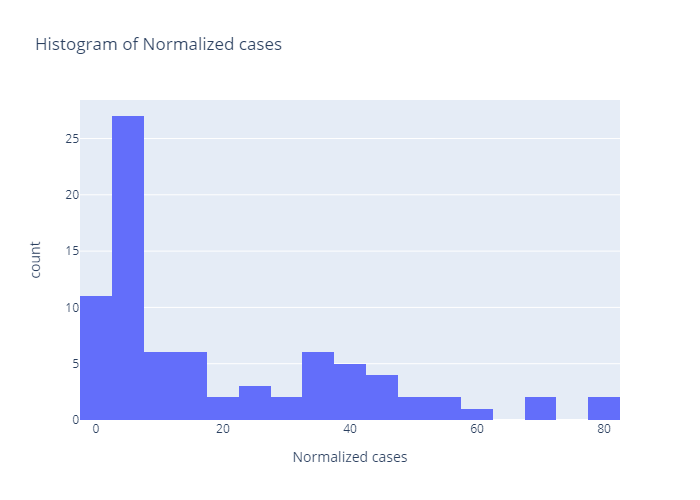

In [4]:
fig = px.histogram(ny_data, x="Normalized cases",nbins=20,title='Histogram of Normalized cases ')
#fig.show()
fig.write_image("../../../Images/member/Amantej/stage_3/ny_histogram.png")
Image(filename="../../../Images/member/Amantej/stage_3/ny_histogram.png")

#### plotting Initial distribution as gamma 

In [5]:
alpha_mom = ny_data['Normalized cases'].mean() ** 2 / ny_data['Normalized cases'].var()
beta_mom = ny_data['Normalized cases'].var() / ny_data['Normalized cases'].mean()
beta_mom 

22.347573079427733

In [6]:
ny_data['NY PDF'] = stats.gamma.pdf(range(0,len(ny_data),1),alpha_mom, beta_mom)
ny_data

,State,Date,countyFIPS,StateFIPS,Cases,Death,Population,new_cases,new_deaths,Normalized cases,Normalized deaths,NY PDF
243,NY,2020-02-02,2235844.0,2232.0,0.000000e+00,0.000000,19453561.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00
244,NY,2020-02-09,2235844.0,2232.0,0.000000e+00,0.000000,19453561.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00
245,NY,2020-02-16,2235844.0,2232.0,0.000000e+00,0.000000,19453561.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00
246,NY,2020-02-23,2235844.0,2232.0,0.000000e+00,0.000000,19453561.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00
247,NY,2020-03-01,2235844.0,2232.0,0.000000e+00,0.000000,19453561.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
319,NY,2021-07-18,2235844.0,2232.0,2.106395e+06,53102.142857,19453561.0,894.714286,5.000000,4.599231,0.025702,2.967540e-24
320,NY,2021-07-25,2235844.0,2232.0,2.114552e+06,53139.428571,19453561.0,1239.857143,5.857143,6.373420,0.030108,1.089440e-24
321,NY,2021-08-01,2235844.0,2232.0,2.128309e+06,53181.428571,19453561.0,2567.142857,5.714286,13.196262,0.029374,3.999691e-25
322,NY,2021-08-08,2235844.0,2232.0,2.147814e+06,53233.571429,19453561.0,3340.857143,8.285714,17.173499,0.042592,1.468471e-25


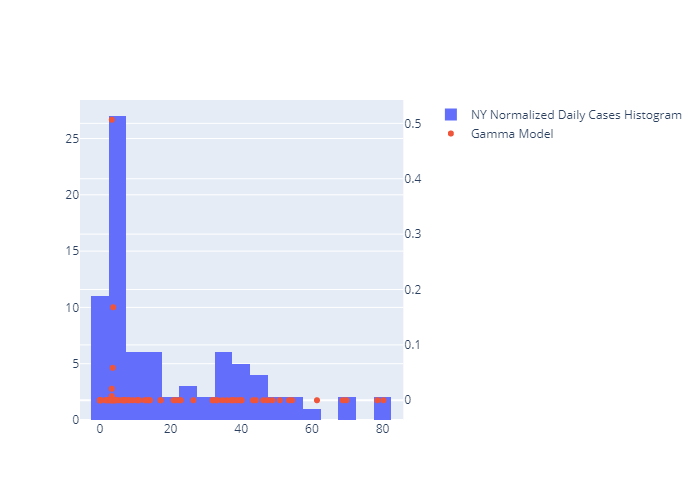

In [7]:
# Calculate the pmf values using the poission distribution and plot
fig = go.Figure()
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Histogram(x=ny_data["Normalized cases"],nbinsx=20,name="NY Normalized Daily Cases Histogram"))
fig.add_trace(go.Scatter(x=ny_data["Normalized cases"], y=ny_data["NY PDF"],mode='markers', name="Gamma Model"), secondary_y=True)
fig.write_image("../../../Images/member/Amantej/stage_3/ny_histDistribution.png")
Image(filename="../../../Images/member/Amantej/stage_3/ny_histDistribution.png")


#### observations:
- The data is left skewed.
- It starts off high and has a long tail
- The data is positive-valued
- The data is discrete.
- The data gives the number of covid-19 cases/deaths observed in period/time interval of a day .
-Equiprobable probability of the occurrence for cases in a given timeline.

-------------------------------------------------------------------------------------------------------------------------------

### Describe the type of distribution (modality) and its statistics (moments of a distribution - center, variance, skewness, kurtosis) in the report and the notebook.

Modality - unimodal

Stats for state: New York

In [8]:
print(' Measure of center:',ny_data['Normalized cases'].mean(),'\n','Measure of spread:',ny_data['Normalized cases'].var(),'\n','Skewness:',ny_data['Normalized cases'].skew(),'\n','Kurtosis:',ny_data['Normalized cases'].kurt(),'\n')

 Measure of center: 19.843403874738804 
 Measure of spread: 443.45191823532485 
 Skewness: 1.1169348305588895 
 Kurtosis: 0.3440613180342176 



-------------------------------------------------------------------------------------------------------------------------------

### Compare the distribution and its statistics to 5 other states of your choosing. Describe if the distributions look different and what does that imply.

#### we can Model a poission distribution, performed that later in this notebook.

As the above gamma distribution does not fit will and data present is discrete we can not work with continuous disribution.
Plotting histograms of selected city to see the data spread/distribution. 

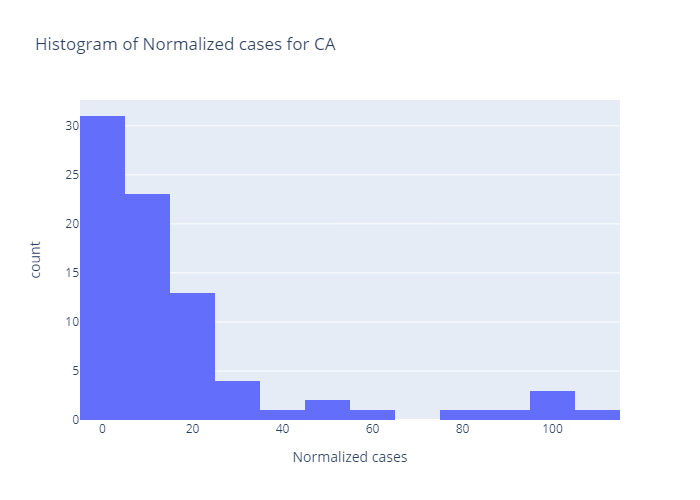

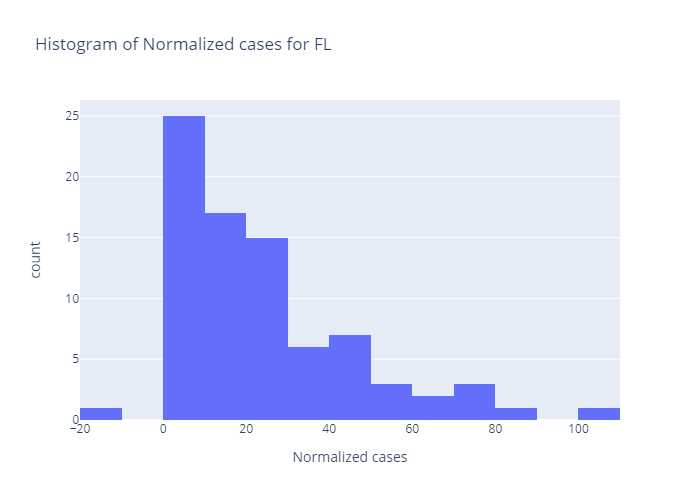

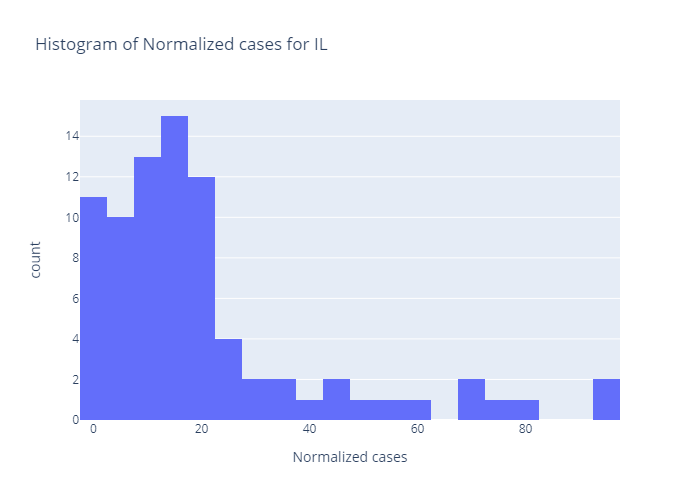

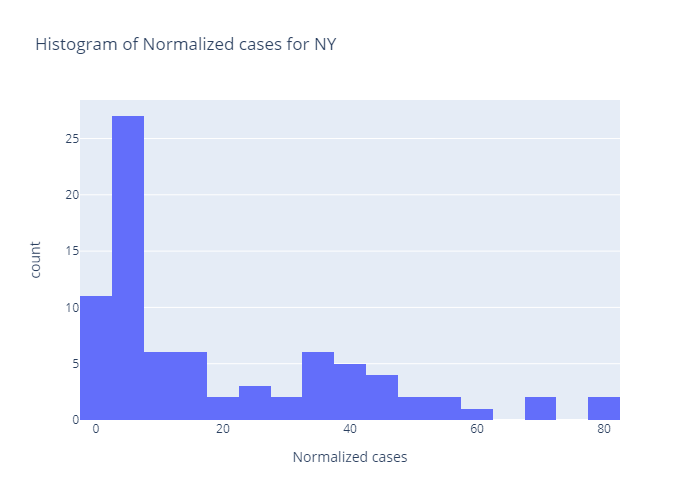

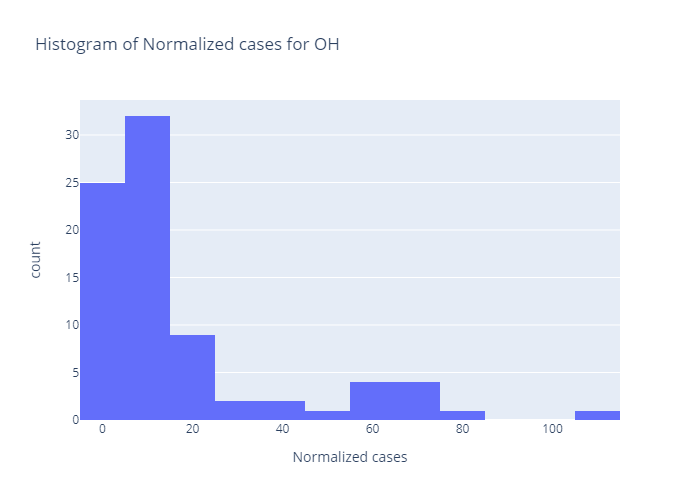

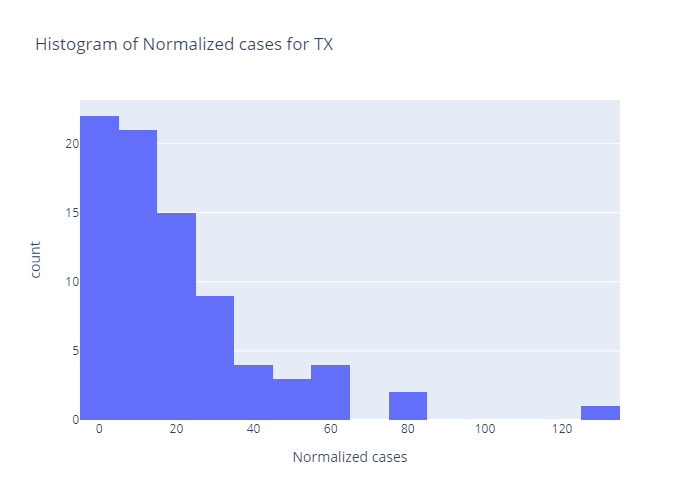

In [9]:
for i in s2.states_data_weekly.State.unique():
    fig = px.histogram(s2.states_data_weekly[s2.states_data_weekly['State']==i], x="Normalized cases",nbins=20,title='Histogram of Normalized cases for '+i)
    fig.write_image("../../../Images/member/Amantej/stage_3/%shistolt.png" %i)
    fig1 = fig.to_image(format="png")
    display(Image(fig1))
    #fig.show()

Comparing statistics to 5 other states of our choice.

In [10]:
s2.states_data_weekly_sum_mean = s2.states_data_weekly.groupby('State')['Normalized cases'].agg(['mean','median','skew','var']).reset_index().round()
s2.states_data_weekly_sum_mean['kurtosis'] = list(s2.states_data_weekly.groupby('State')['Normalized cases'].apply(pd.DataFrame.kurt))
s2.states_data_weekly_sum_mean['Population'] = s2.states_data1['Population'].unique()
s2.states_data_weekly_sum_mean

,State,mean,median,skew,var,kurtosis,Population
0,CA,18.0,8.0,2.0,639.0,4.996972,39512223
1,FL,24.0,18.0,1.0,530.0,1.355964,21477737
2,IL,20.0,14.0,2.0,467.0,3.351471,12671821
3,NY,20.0,9.0,1.0,443.0,0.344061,19453561
4,OH,17.0,9.0,2.0,500.0,3.631684,11689100
5,TX,20.0,14.0,2.0,496.0,7.448280,28995881


observations: 
- All states follow similar trends
- statistical data also fits in similar range for the selected states

-------------------------------------------------------------------------------------------------------------------------------

### Model a poission distribution of new COVID-19 cases and deaths of a state and compare to other 5 states. Describe how the poission modeling is different from the first modeling you did.

Calculating pmf values

In [11]:
ny_data['NY PMF'] = stats.poisson.pmf(k=ny_data['Normalized cases'].round(decimals=0), mu = ny_data['Normalized cases'].mean())
ny_data

,State,Date,countyFIPS,StateFIPS,Cases,Death,Population,new_cases,new_deaths,Normalized cases,Normalized deaths,NY PDF,NY PMF
243,NY,2020-02-02,2235844.0,2232.0,0.000000e+00,0.000000,19453561.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.410567e-09
244,NY,2020-02-09,2235844.0,2232.0,0.000000e+00,0.000000,19453561.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.410567e-09
245,NY,2020-02-16,2235844.0,2232.0,0.000000e+00,0.000000,19453561.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.410567e-09
246,NY,2020-02-23,2235844.0,2232.0,0.000000e+00,0.000000,19453561.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.410567e-09
247,NY,2020-03-01,2235844.0,2232.0,0.000000e+00,0.000000,19453561.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.410567e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,NY,2021-07-18,2235844.0,2232.0,2.106395e+06,53102.142857,19453561.0,894.714286,5.000000,4.599231,0.025702,2.967540e-24,6.180432e-05
320,NY,2021-07-25,2235844.0,2232.0,2.114552e+06,53139.428571,19453561.0,1239.857143,5.857143,6.373420,0.030108,1.089440e-24,2.044013e-04
321,NY,2021-08-01,2235844.0,2232.0,2.128309e+06,53181.428571,19453561.0,2567.142857,5.714286,13.196262,0.029374,3.999691e-25,2.863183e-02
322,NY,2021-08-08,2235844.0,2232.0,2.147814e+06,53233.571429,19453561.0,3340.857143,8.285714,17.173499,0.042592,1.468471e-25,7.771871e-02


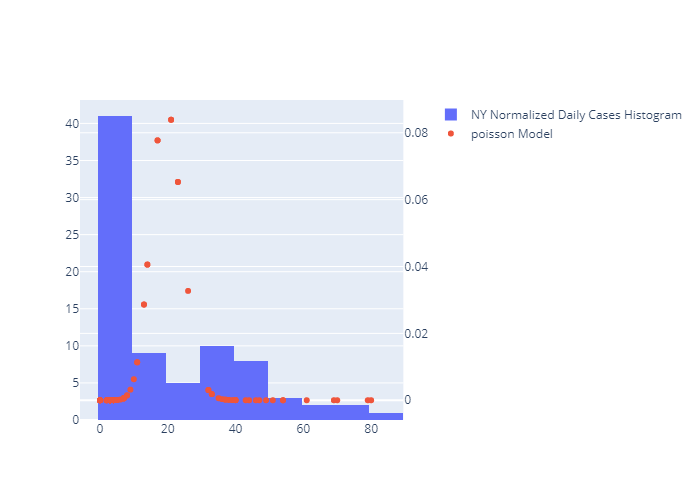

In [12]:
fig = go.Figure()
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Histogram(x=ny_data['Normalized cases'].round(decimals=0),name="NY Normalized Daily Cases Histogram"))
fig.add_trace(go.Scatter(x=ny_data['Normalized cases'].round(decimals=0), y=ny_data["NY PMF"],mode='markers', name="poisson Model"), secondary_y=True)
fig.write_image("../../../Images/member/Amantej/stage_3/nymean_histDistribution+poisson.png")
Image(filename="../../../Images/member/Amantej/stage_3/nymean_histDistribution+poisson.png")
#fig.show()

If we take mu as "Median"

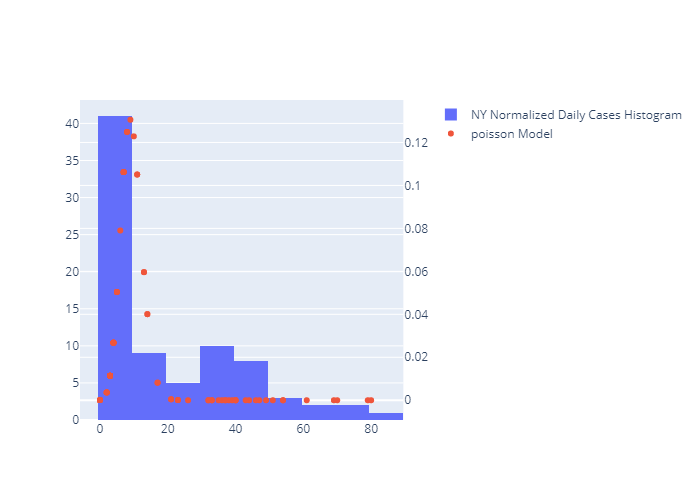

In [13]:
ny_data['NY PMF1'] = stats.poisson.pmf(k=ny_data['Normalized cases'].round(decimals=0), mu = ny_data['Normalized cases'].median())
fig = go.Figure()
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Histogram(x=ny_data['Normalized cases'].round(decimals=0),name="NY Normalized Daily Cases Histogram"))
fig.add_trace(go.Scatter(x=ny_data['Normalized cases'].round(decimals=0), y=ny_data["NY PMF1"],mode='markers', name="poisson Model"), secondary_y=True)
fig.write_image("../../../Images/member/Amantej/stage_3/ny_histDistribution+poisson.png")
Image(filename="../../../Images/member/Amantej/stage_3/ny_histDistribution+poisson.png")
#fig.show()

In order to view poisson distribution clearly, Took a range(low-high) of values with step

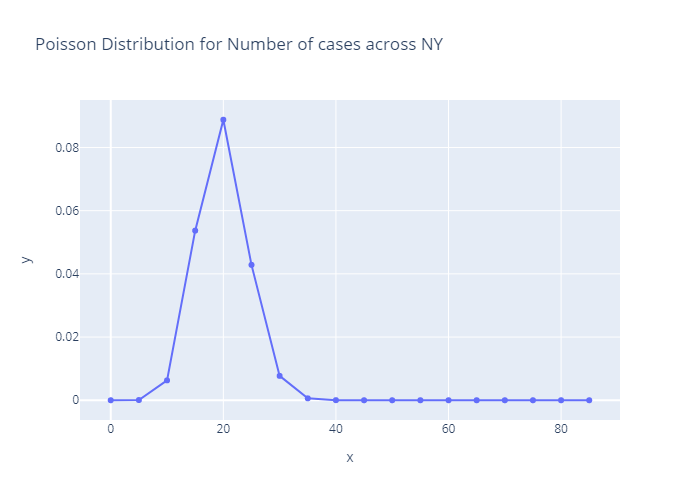

In [14]:
fig = px.scatter(ny_data, x=range(0,90,5), y=stats.poisson.pmf(k=range(0,90,5),mu=ny_data['Normalized cases'].mean()),title='Poisson Distribution for Number of cases across NY')
fig.update_traces(mode='lines+markers')
fig.write_image("../../../Images/member/Amantej/stage_3/ny_Distribution.png")
Image(filename="../../../Images/member/Amantej/stage_3/ny_Distribution.png")

In [15]:
states_data_filter = s2.states_data_weekly[['State', 'Normalized cases', 'Normalized deaths']]
states_data_filter

,State,Normalized cases,Normalized deaths
0,CA,0.000723,0.000000
1,CA,0.000723,0.000362
2,CA,0.000723,0.000000
3,CA,0.001446,0.000362
4,CA,0.003616,0.000000
...,...,...,...
481,TX,11.011909,0.081292
482,TX,17.632061,0.096565
483,TX,31.053179,0.127112
484,TX,47.780185,0.175887


In [16]:
states_data_filter1=states_data_filter.groupby('State')['Normalized cases'].agg('mean').reset_index().round(decimals=0)
states_data_filter1

,State,Normalized cases
0,CA,18.0
1,FL,24.0
2,IL,20.0
3,NY,20.0
4,OH,17.0
5,TX,20.0


In [17]:
k,p,s = [],[],[]
for i in states_data_filter1['State']:
    prob = pd.DataFrame()
    temp = states_data_filter[states_data_filter['State'] == i]
    for j1 in temp['Normalized cases'].round(decimals=0): k.append(j1)
    for j2 in temp['State']: s.append(j2)
    #k_value = temp['Normalized cases'].round(decimals=0).reset_index()
    prob['probability'] = stats.poisson.pmf(k= temp['Normalized cases'].round(decimals=0),mu= temp['Normalized cases'].mean())
    for j in prob['probability']: p.append(j)
d = {'k':k,'p':p,'state':s}
pmf = pd.DataFrame(d)
pmf

,k,p,state
0,0.0,1.812456e-08,CA
1,0.0,1.812456e-08,CA
2,0.0,1.812456e-08,CA
3,0.0,1.812456e-08,CA
4,0.0,1.812456e-08,CA
...,...,...,...
481,11.0,9.580744e-03,TX
482,18.0,8.248610e-02,TX
483,31.0,6.057530e-03,TX
484,48.0,6.323486e-08,TX


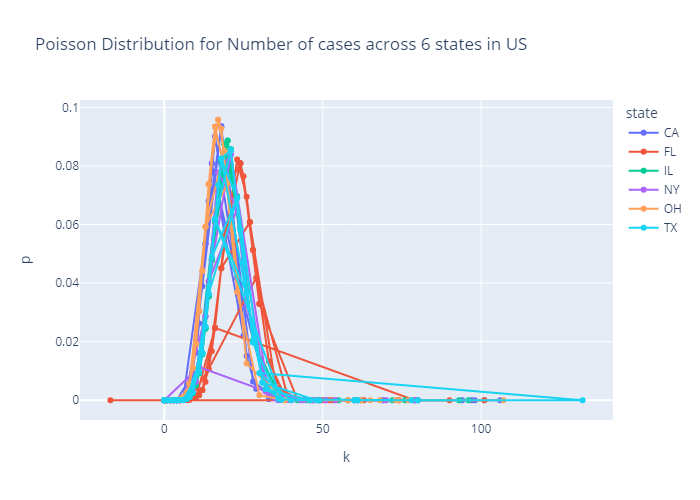

In [18]:
#plot the poisson distribution cases
fig = px.scatter(pmf, x="k", y="p", color='state',title='Poisson Distribution for Number of cases across 6 states in US')
fig.update_traces(mode='lines+markers')
fig.write_image("../../../Images/member/Amantej/stage_3/cases_PoissonDistribution.png")
Image(filename="../../../Images/member/Amantej/stage_3//cases_PoissonDistribution.png")
#fig.show()

In [19]:
k1,p1,s1 = [],[],[]
for i in states_data_filter1['State']:
    prob = pd.DataFrame()
    temp = states_data_filter[states_data_filter['State'] == i]
    for j1 in temp['Normalized deaths'].round(decimals=0): k1.append(j1)
    for j2 in temp['State']: s1.append(j2)
    prob['probability'] = stats.poisson.pmf(k= temp['Normalized deaths'].round(decimals=0),mu= temp['Normalized deaths'].mean())
    for j in prob['probability']: p1.append(j)
d1 = {'k':k1,'p':p1,'state':s1}
pmf1 = pd.DataFrame(d1)
pmf1

,k,p,state
0,0.0,0.751725,CA
1,0.0,0.751725,CA
2,0.0,0.751725,CA
3,0.0,0.751725,CA
4,0.0,0.751725,CA
...,...,...,...
481,0.0,0.724112,TX
482,0.0,0.724112,TX
483,0.0,0.724112,TX
484,0.0,0.724112,TX


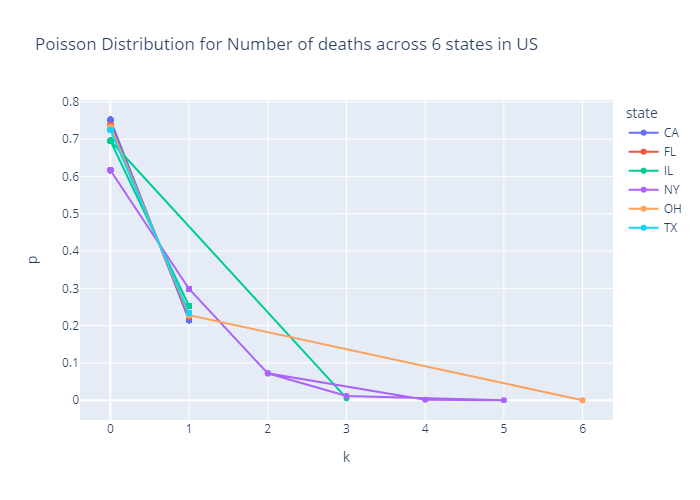

In [20]:
#plot the poisson distribution deaths
fig = px.scatter(pmf1, x="k", y="p", color='state',title='Poisson Distribution for Number of deaths across 6 states in US')
fig.update_traces(mode='lines+markers')
fig.write_image("../../../Images/member/Amantej/stage_3/deaths_PoissonDistribution.png")
Image(filename="../../../Images/member/Amantej/stage_3/deaths_PoissonDistribution.png")
#fig.show()

By observing the distribution plots for cases/deaths of 6 states, we can say all states has similar distribution that to left skewed. We can understand mostly values would be in 0-10 range as we are taking normalized and mostly cases/deaths has that repeated values.

-------------------------------------------------------------------------------------------------------------------------------

### Perform corelation between Enrichment data valiables and COVID-19 cases to observe any patterns.

You can compare either within your chosen specific state or among different states with the different enrichment variables. Within the state you can compare the county based covid data to enrichment data for correlation. Between states you would need to aggregate to state level data and then perform correlation. Both covid and enrichment data will need to be normalized for population. For number of covid cases you can use a measure of center value (median or mean) to compare the number of cases.

## By State level

Population dataset from stage 01 to normalise enrichment variables.

In [21]:
population = pd.read_csv("../../../data/stage_1/covid_county_population_usafacts.csv")
county_population = population
population = population[population["State"].isin(['CA','IL','OH','NY','TX','FL'])]
population = population.groupby(['State']).sum().reset_index()
population

,State,countyFIPS,population
0,CA,357364,39512223
1,FL,808550,21477737
2,IL,1744404,12671821
3,NY,2235844,19453561
4,OH,3439744,11689100
5,TX,12256516,28995881


Taking stage02 generated data of 6 selected states

In [22]:
long_cov =  s2.states_data
long_cov = long_cov.groupby(['State']).sum().reset_index()
long_cov['Population'] = population['population']
long_cov['Normalized cases'] = (long_cov['new_cases']/long_cov['Population'])*100000
long_cov['Normalized deaths'] = (long_cov['new_deaths']/long_cov['Population'])*100000
long_cov

,State,countyFIPS,StateFIPS,Cases,Death,Population,new_cases,new_deaths,Normalized cases,Normalized deaths
0,CA,200980208,199056,978837537,15647923,39512223,4033071.0,64040.0,10207.147798,162.076429
1,FL,462490600,459888,621451793,10183480,21477737,2877213.0,36973.0,13396.257716,172.145697
2,IL,997799088,991848,373649057,7360349,12671821,1466741.0,26123.0,11574.824171,206.150324
3,NY,1278902768,1276704,544999563,19456298,19453561,2192336.0,53403.0,11269.587095,274.515293
4,OH,1967533568,1963104,278378112,5097669,11689100,1161573.0,20609.0,9937.232122,176.309553
5,TX,7010727152,6973824,783139885,13321681,28995881,3329808.0,53081.0,11483.727637,183.063932


Reading enrichment data

In [23]:
enrich_economic = pd.read_csv("../../../data/stage_1/filtered_economic.csv")
enrich_economic.drop(['Unnamed: 0'],1,inplace = True)
enrich_economic.head()

,countyFIPS,County Name,State,Total people commuting to work,Driving alone,Carpooled,Only public transports,Walked,Other means,Work from home,...,Service occupations,Sales and office occupations,"Natural resources, construction, and maintenance occupations","Production, transportation, and material moving occupations",Private health insurance,Public health insurance,No health insurance,Total households,Mean household income,Per capita income
0,1001,Autauga County,AL,24635,21134,1994,162,211,295,839,...,4115,5405,1909,3816,38855,19242,3856,21397,75326,29819
1,1003,Baldwin County,AL,93141,78015,7242,45,559,1223,6057,...,16913,22607,8863,11411,148438,76905,18679,80930,80986,32626
2,1005,Barbour County,AL,8231,6759,956,27,221,145,123,...,1292,1608,1185,2067,11916,11575,2544,9345,47068,18473
3,1007,Bibb County,AL,8167,7110,729,0,11,60,257,...,1325,1769,1405,2180,12491,8384,2201,6891,60182,20778
4,1009,Blount County,AL,21690,18983,2098,28,97,155,329,...,2869,4431,3552,4452,38888,19499,6159,20847,65639,24747


In [24]:
enrich_economic = enrich_economic.replace({'Mean travel time to work' : { 'N' : 0}})
enrich_economic['Mean travel time to work'] = pd.to_numeric(enrich_economic['Mean travel time to work'])

Filtering states as per our above data

In [25]:
enrich_economic_filter = enrich_economic[enrich_economic["State"].isin(['CA','IL','OH','NY','TX','FL'])]

Grouping by state

In [26]:
enrich_economic_filter = enrich_economic_filter.groupby(['State']).sum().reset_index()
enrich_economic_filter['population'] = population['population']
enrich_economic_filter

,State,countyFIPS,Total people commuting to work,Driving alone,Carpooled,Only public transports,Walked,Other means,Work from home,Mean travel time to work,...,Sales and office occupations,"Natural resources, construction, and maintenance occupations","Production, transportation, and material moving occupations",Private health insurance,Public health insurance,No health insurance,Total households,Mean household income,Per capita income,population
0,CA,351364,18191555,13411041,1841632,923834,476291,464791,1073966,1516.8,...,3948186,1675325,2236854,24742908,14726131,2915070,13044266,5316329,1960320,39512223
1,FL,808550,9383111,7420475,865300,170350,134920,213654,578412,1818.8,...,2335270,888033,997634,12900284,7610126,2637268,7736311,4706800,1846740,21477737
2,IL,1744404,6151965,4487622,484736,581552,182930,110912,304213,2455.2,...,1366039,451379,938179,8857221,4254404,859612,4846134,7380906,2995138,12671821
3,NY,2235844,9300315,4931345,601046,2600500,570614,190148,406662,1616.3,...,2032222,677985,950173,12994267,7573943,1117159,7343234,5088701,2019862,19453561
4,OH,3439744,5488776,4551587,430114,86636,122768,65866,231805,2181.4,...,1197246,417199,950234,7972137,4268309,702499,4676358,6310804,2521394,11689100
5,TX,12256516,13115511,10560476,1308229,181273,200955,203366,661212,5969.3,...,2937388,1433389,1726536,17397969,7966660,4791164,9691647,17991131,6675248,28995881


In [27]:
enrich_economic_filter.dtypes

State                                                            object
countyFIPS                                                        int64
Total people commuting to work                                    int64
Driving alone                                                     int64
Carpooled                                                         int64
Only public transports                                            int64
Walked                                                            int64
Other means                                                       int64
Work from home                                                    int64
Mean travel time to work                                        float64
Total people has occupation                                       int64
Management&business&science&arts occupations                      int64
Service occupations                                               int64
Sales and office occupations                                    

The list of variables/columns considered for correlation.

In [28]:
x = ['Private health insurance','No health insurance', 'Work from home','Total households']

In [29]:
enrich_economic_filter1 = pd.DataFrame()
enrich_economic_filter1['State'] = enrich_economic_filter['State']
for i in x:
    enrich_economic_filter1[i]= (enrich_economic_filter[i]/enrich_economic_filter['population'])*100000
enrich_economic_filter1

,State,Private health insurance,No health insurance,Work from home,Total households
0,CA,62620.895817,7377.641091,2718.060181,33013.242510
1,FL,60063.516003,12279.077633,2693.077022,36020.140297
2,IL,69896.986392,6783.650116,2400.704682,38243.390591
3,NY,66796.341297,5742.696671,2090.424473,37747.505457
4,OH,68201.461190,6009.863890,1983.086807,40006.142475
5,TX,60001.518836,16523.602094,2280.365270,33424.219806


Performing merge on selected states and selected columns/variables of enrichment data

In [30]:
en_merge = pd.merge(long_cov, enrich_economic_filter1, on = ['State'])
en_merge = en_merge.drop(['countyFIPS','Cases','Death','StateFIPS','new_cases','new_deaths'],1)
en_merge

,State,Population,Normalized cases,Normalized deaths,Private health insurance,No health insurance,Work from home,Total households
0,CA,39512223,10207.147798,162.076429,62620.895817,7377.641091,2718.060181,33013.242510
1,FL,21477737,13396.257716,172.145697,60063.516003,12279.077633,2693.077022,36020.140297
2,IL,12671821,11574.824171,206.150324,69896.986392,6783.650116,2400.704682,38243.390591
3,NY,19453561,11269.587095,274.515293,66796.341297,5742.696671,2090.424473,37747.505457
4,OH,11689100,9937.232122,176.309553,68201.461190,6009.863890,1983.086807,40006.142475
5,TX,28995881,11483.727637,183.063932,60001.518836,16523.602094,2280.365270,33424.219806


Performing correlation on selected columns of enrichment data

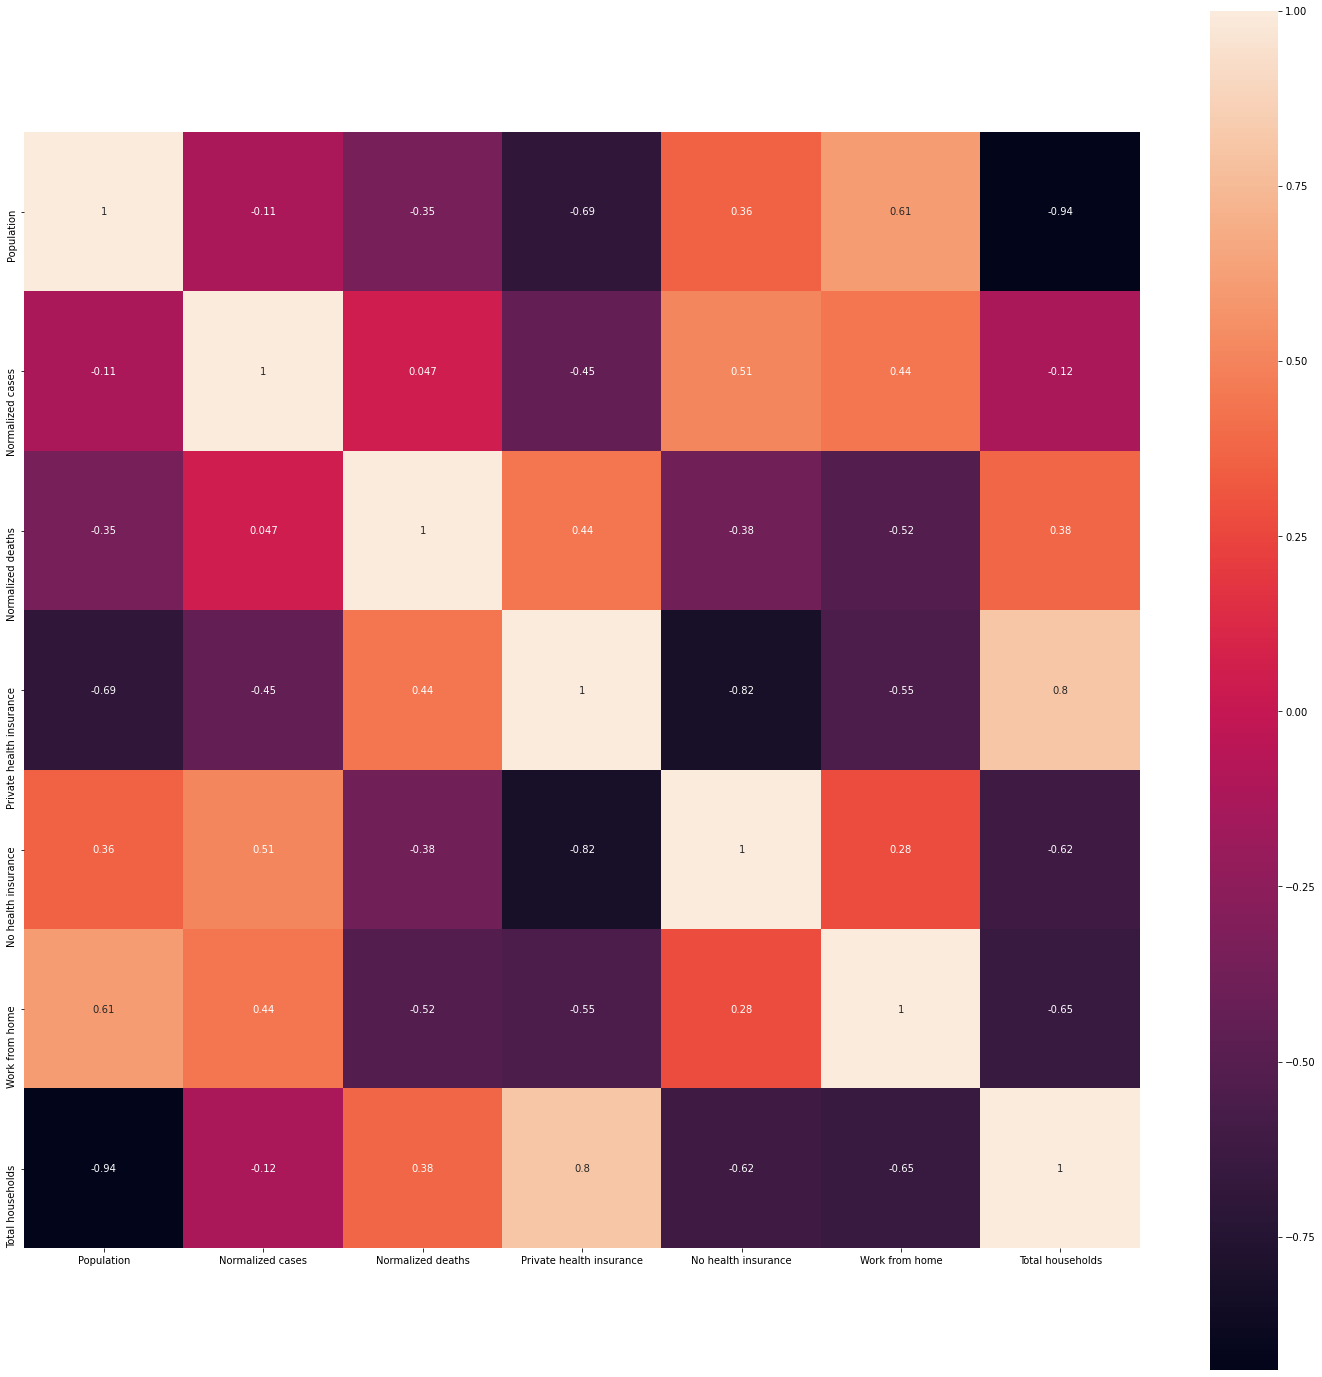

In [31]:
correlation = en_merge.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(correlation, annot=True, square=True)

-------------------------------------------------------------------------------------------------------------------------------

## Formulate hypothesis between Enrichment data and number of cases to be compared against states. Choose 3 different variables to compare against.
For example: Does higher employment data lead to higher covid case numbers or more rapid increase in covid cases.

- Not having health insurance influence increase in covid cases.
- Work from home influence increase in cases
- Having private health insurance influence decreases in covid cases.


## By county level

Similar approch as state level

In [32]:
long_covid = pd.read_csv('../../../data/stage_1/long_large_covid.csv')
long_covid = long_covid[long_covid['State'] == 'NC']
long_covid = long_covid[long_covid['County Name'] != 'Statewide Unallocated']
long_covid

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,Population
1102452,37001,Alamance County,NC,37,2020-01-22,0,0,169509
1102453,37001,Alamance County,NC,37,2020-01-23,0,0,169509
1102454,37001,Alamance County,NC,37,2020-01-24,0,0,169509
1102455,37001,Alamance County,NC,37,2020-01-25,0,0,169509
1102456,37001,Alamance County,NC,37,2020-01-26,0,0,169509
...,...,...,...,...,...,...,...,...
1159747,37199,Yancey County,NC,37,2021-08-12,1864,28,18069
1159748,37199,Yancey County,NC,37,2021-08-13,1868,28,18069
1159749,37199,Yancey County,NC,37,2021-08-14,1868,28,18069
1159750,37199,Yancey County,NC,37,2021-08-15,1868,28,18069


In [33]:
long_covid['new_cases'] = long_covid['Cases'].diff()
long_covid['new_deaths'] = long_covid['Death'].diff()
long_covid= long_covid[long_covid['Date'] != '2020-01-22']
long_covid['Normalized cases'] = (long_covid['new_cases']/long_covid['Population'])*10000
long_covid['Normalized deaths'] = (long_covid['new_deaths']/long_covid['Population'])*10000
long_covid = long_covid.groupby(['County Name']).sum().reset_index()
long_covid

,County Name,countyFIPS,StateFIPS,Cases,Death,Population,new_cases,new_deaths,Normalized cases,Normalized deaths
0,Alamance County,21164572,21164,4744102,69663,96959148,20380.0,289.0,1202.296043,17.049242
1,Alexander County,21165716,21164,1097411,18884,21448284,4869.0,85.0,1298.503880,22.668480
2,Alleghany County,21166860,21164,272870,1143,6370364,1143.0,5.0,1026.308701,4.489539
3,Anson County,21168004,21164,669698,13250,13983112,2847.0,57.0,1164.607707,23.316698
4,Ashe County,21169148,21164,536080,9728,15560116,2456.0,45.0,902.841598,16.542293
...,...,...,...,...,...,...,...,...,...,...
95,Wayne County,21273252,21164,3231312,66296,70430932,12491.0,247.0,1014.448027,20.059936
96,Wilkes County,21274396,21164,1768198,30465,39131664,7813.0,119.0,1142.051102,17.394609
97,Wilson County,21275540,21164,2553313,47684,46790172,10502.0,186.0,1283.847386,22.738108
98,Yadkin County,21276684,21164,1057718,12814,21545524,4541.0,56.0,1205.564553,14.867125


In [34]:
en_economic = pd.read_csv("../../../data/stage_1/filtered_economic.csv")
en_economic = en_economic[en_economic['State'] == 'NC']
en_economic = en_economic.replace({'Mean travel time to work' : { 'N' : 0}})
en_economic['Mean travel time to work'] = pd.to_numeric(en_economic['Mean travel time to work'])
en_economic = en_economic.groupby(['County Name']).sum().reset_index()
long_covid['County Name'] = long_covid['County Name'].apply(lambda cn: cn.strip())
inital_merge1 = pd.merge(long_covid, en_economic, on = ['County Name'])
inital_merge1 = inital_merge1.drop(['Unnamed: 0','StateFIPS'],1)
inital_merge1

,County Name,countyFIPS_x,Cases,Death,Population,new_cases,new_deaths,Normalized cases,Normalized deaths,countyFIPS_y,...,Service occupations,Sales and office occupations,"Natural resources, construction, and maintenance occupations","Production, transportation, and material moving occupations",Private health insurance,Public health insurance,No health insurance,Total households,Mean household income,Per capita income
0,Alamance County,21164572,4744102,69663,96959148,20380.0,289.0,1202.296043,17.049242,37001,...,13480,16965,7749,13653,106829,57892,18177,64439,67667,27312
1,Alexander County,21165716,1097411,18884,21448284,4869.0,85.0,1298.503880,22.668480,37003,...,2186,3012,1622,5527,23522,14336,3185,14169,68416,26688
2,Alleghany County,21166860,272870,1143,6370364,1143.0,5.0,1026.308701,4.489539,37005,...,752,1084,768,645,6329,5421,1230,4920,51814,23267
3,Anson County,21168004,669698,13250,13983112,2847.0,57.0,1164.607707,23.316698,37007,...,2131,1339,1294,2992,13580,10111,2560,9521,52077,21635
4,Ashe County,21169148,536080,9728,15560116,2456.0,45.0,902.841598,16.542293,37009,...,2383,2789,2235,1734,17190,11437,3340,11938,55125,24814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Wayne County,21273252,3231312,66296,70430932,12491.0,247.0,1014.448027,20.059936,37191,...,9735,11068,6387,10122,70291,51046,15036,48343,62307,25277
96,Wilkes County,21274396,1768198,30465,39131664,7813.0,119.0,1142.051102,17.394609,37193,...,5174,6139,3773,6127,42520,27469,7702,28753,59515,25202
97,Wilson County,21275540,2553313,47684,46790172,10502.0,186.0,1283.847386,22.738108,37195,...,6166,6924,3655,7391,47542,34208,9782,32014,60985,24790
98,Yadkin County,21276684,1057718,12814,21545524,4541.0,56.0,1205.564553,14.867125,37197,...,2538,3020,2067,3911,23788,14986,4040,15425,59932,25218


In [35]:
county_population = county_population[county_population['State'] == 'NC']
county_population = county_population[county_population['County Name'] != 'Statewide Unallocated']
county_population = county_population[county_population['County Name'] != 'New York City Unallocated'].reset_index()
inital_merge1['Population'] = county_population['population']
inital_merge1.to_csv('../../../data/stage_1/NC-enrich.csv')
inital_merge1

,County Name,countyFIPS_x,Cases,Death,Population,new_cases,new_deaths,Normalized cases,Normalized deaths,countyFIPS_y,...,Service occupations,Sales and office occupations,"Natural resources, construction, and maintenance occupations","Production, transportation, and material moving occupations",Private health insurance,Public health insurance,No health insurance,Total households,Mean household income,Per capita income
0,Alamance County,21164572,4744102,69663,169509,20380.0,289.0,1202.296043,17.049242,37001,...,13480,16965,7749,13653,106829,57892,18177,64439,67667,27312
1,Alexander County,21165716,1097411,18884,37497,4869.0,85.0,1298.503880,22.668480,37003,...,2186,3012,1622,5527,23522,14336,3185,14169,68416,26688
2,Alleghany County,21166860,272870,1143,11137,1143.0,5.0,1026.308701,4.489539,37005,...,752,1084,768,645,6329,5421,1230,4920,51814,23267
3,Anson County,21168004,669698,13250,24446,2847.0,57.0,1164.607707,23.316698,37007,...,2131,1339,1294,2992,13580,10111,2560,9521,52077,21635
4,Ashe County,21169148,536080,9728,27203,2456.0,45.0,902.841598,16.542293,37009,...,2383,2789,2235,1734,17190,11437,3340,11938,55125,24814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Wayne County,21273252,3231312,66296,123131,12491.0,247.0,1014.448027,20.059936,37191,...,9735,11068,6387,10122,70291,51046,15036,48343,62307,25277
96,Wilkes County,21274396,1768198,30465,68412,7813.0,119.0,1142.051102,17.394609,37193,...,5174,6139,3773,6127,42520,27469,7702,28753,59515,25202
97,Wilson County,21275540,2553313,47684,81801,10502.0,186.0,1283.847386,22.738108,37195,...,6166,6924,3655,7391,47542,34208,9782,32014,60985,24790
98,Yadkin County,21276684,1057718,12814,37667,4541.0,56.0,1205.564553,14.867125,37197,...,2538,3020,2067,3911,23788,14986,4040,15425,59932,25218


In [36]:
inital_merge1_filter1 = pd.DataFrame()
inital_merge1_filter1['County Name'] = inital_merge1['County Name']
for i in x:
    inital_merge1_filter1[i]= (inital_merge1[i]/inital_merge1['Population'])*10000
inital_merge1_filter1

,County Name,Private health insurance,No health insurance,Work from home,Total households
0,Alamance County,6302.261237,1072.332443,147.543788,3801.509064
1,Alexander County,6273.035176,849.401285,156.279169,3778.702296
2,Alleghany County,5682.858939,1104.426686,213.702074,4417.706743
3,Anson County,5555.101039,1047.206087,59.314407,3894.706700
4,Ashe County,6319.155975,1227.805757,299.599309,4388.486564
...,...,...,...,...,...
95,Wayne County,5708.635518,1221.138462,123.608190,3926.143701
96,Wilkes County,6215.283868,1125.825879,129.509443,4202.917617
97,Wilson County,5811.909390,1195.828902,94.864366,3913.644087
98,Yadkin County,6315.342342,1072.556880,213.183954,4095.096504


In [37]:
inital_merge1_filter1['Normalized cases'] = inital_merge1['Normalized cases']
inital_merge1_filter1['Normalized deaths'] = inital_merge1['Normalized deaths']
inital_merge1_filter1

,County Name,Private health insurance,No health insurance,Work from home,Total households,Normalized cases,Normalized deaths
0,Alamance County,6302.261237,1072.332443,147.543788,3801.509064,1202.296043,17.049242
1,Alexander County,6273.035176,849.401285,156.279169,3778.702296,1298.503880,22.668480
2,Alleghany County,5682.858939,1104.426686,213.702074,4417.706743,1026.308701,4.489539
3,Anson County,5555.101039,1047.206087,59.314407,3894.706700,1164.607707,23.316698
4,Ashe County,6319.155975,1227.805757,299.599309,4388.486564,902.841598,16.542293
...,...,...,...,...,...,...,...
95,Wayne County,5708.635518,1221.138462,123.608190,3926.143701,1014.448027,20.059936
96,Wilkes County,6215.283868,1125.825879,129.509443,4202.917617,1142.051102,17.394609
97,Wilson County,5811.909390,1195.828902,94.864366,3913.644087,1283.847386,22.738108
98,Yadkin County,6315.342342,1072.556880,213.183954,4095.096504,1205.564553,14.867125


In [38]:
inital_merge1.dtypes

County Name                                                      object
countyFIPS_x                                                      int64
Cases                                                             int64
Death                                                             int64
Population                                                        int64
new_cases                                                       float64
new_deaths                                                      float64
Normalized cases                                                float64
Normalized deaths                                               float64
countyFIPS_y                                                      int64
Total people commuting to work                                    int64
Driving alone                                                     int64
Carpooled                                                         int64
Only public transports                                          

In [39]:
corr = inital_merge1_filter1.corr()
corr

,Private health insurance,No health insurance,Work from home,Total households,Normalized cases,Normalized deaths
Private health insurance,1.000000,-0.077466,0.499502,0.548844,-0.214656,-0.442839
No health insurance,-0.077466,1.000000,-0.181039,0.492837,0.278376,0.245411
Work from home,0.499502,-0.181039,1.000000,0.034572,-0.369036,-0.561917
Total households,0.548844,0.492837,0.034572,1.000000,-0.003239,0.045578
Normalized cases,-0.214656,0.278376,-0.369036,-0.003239,1.000000,0.509210
Normalized deaths,-0.442839,0.245411,-0.561917,0.045578,0.509210,1.000000


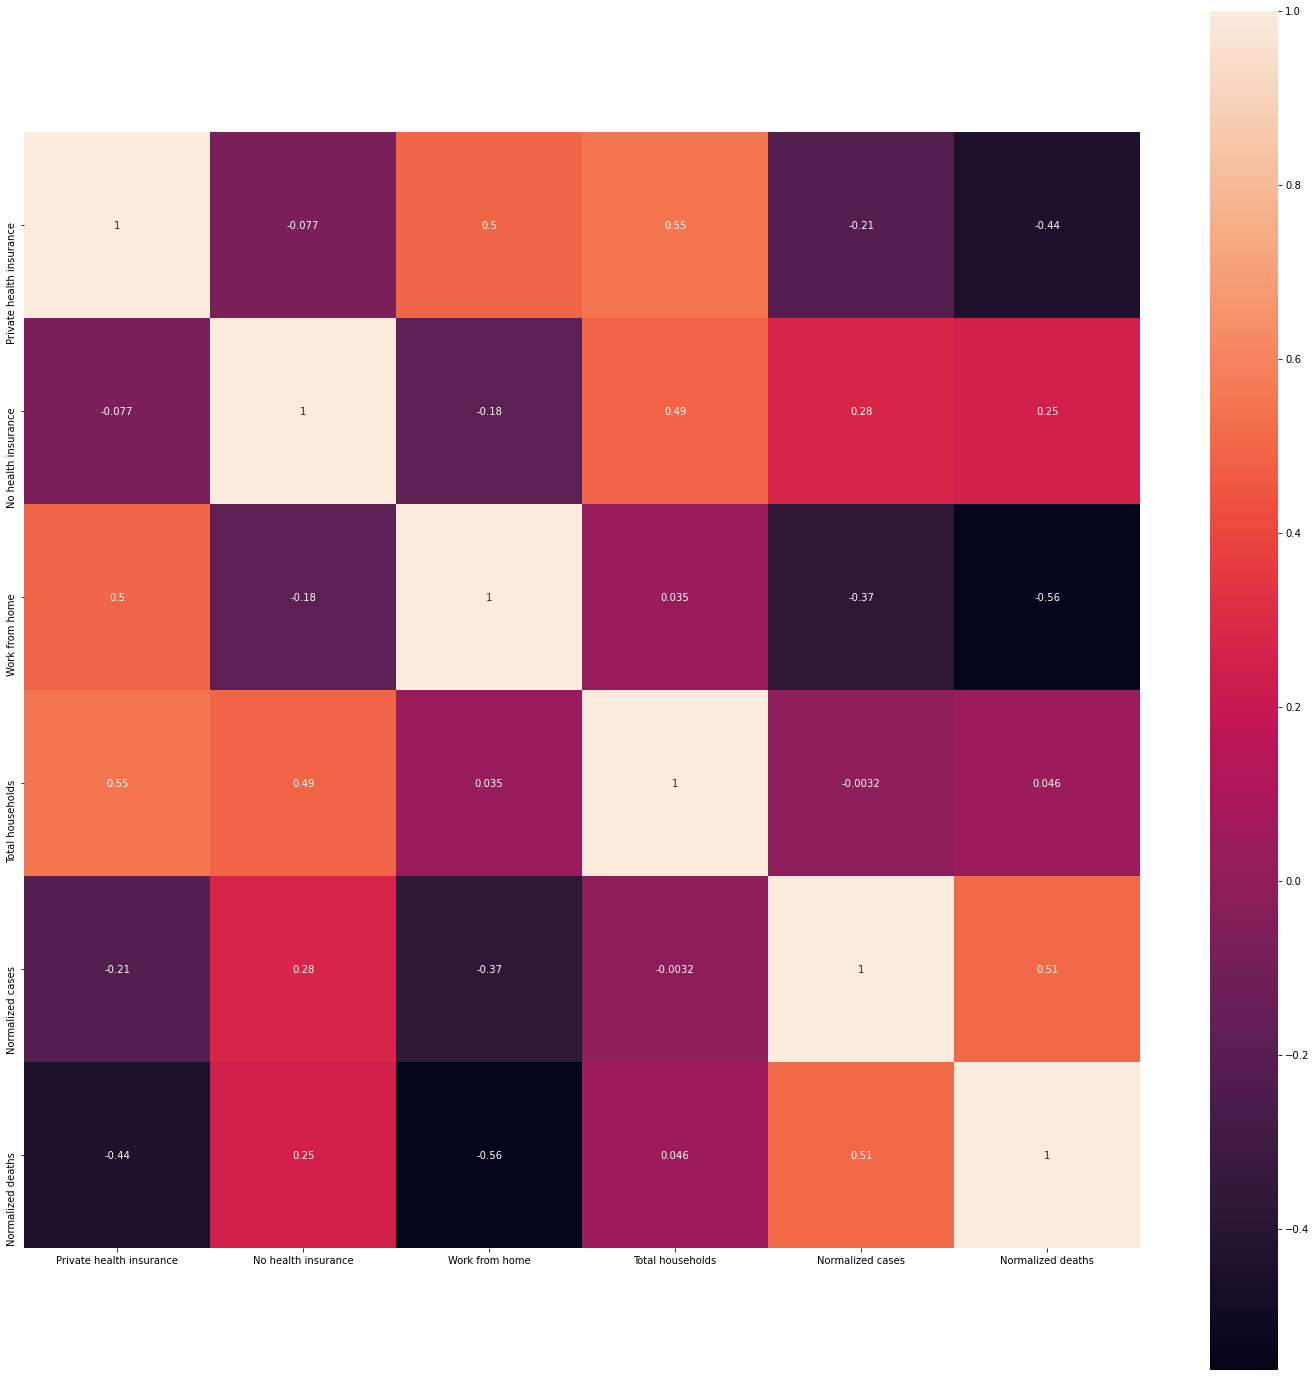

In [40]:
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, square=True)